<a href="https://colab.research.google.com/github/trisharangi/walmart-weekly-sales-forcasting-model-lmh2-25/blob/main/Walmart_Weekly_Sales_Model_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task: Time Series Forecasting with Linear Regression

Your goal is to build a simple **linear regression model** for forecasting, using the provided dataset. Follow the steps below to complete the task:

---

### Steps:

1. **Preprocess the Data**

   * Remove any columns that are not useful for modeling.
   * Add a feature indicating the **type of holiday**, if applicable.
   * Normalize or scale the features as needed.

2. **Split the Data**

   * Perform a random **80:20 split** into training and testing sets.

3. **Build and Train the Model**

   * Use **Linear Regression** to model the data.
   * You can use any framework you're comfortable with — e.g., `NumPy`, `scikit-learn`, or `PyTorch`.

4. **Evaluate the Model**

   * Report the following metrics on the test set:

     * **Mean Absolute Error (MAE)**
     * **Root Mean Squared Error (RMSE)**

5. **Visualize the Results**

   * Create relevant plots to illustrate the model's performance (e.g., predicted vs actual, residuals, etc.).


## Task: Predict Weekly Sales at a Walmart Store Using Linear Regression

In this task, you will build a **linear regression model** to predict **weekly sales** for Walmart stores using historical data.

### Dataset Overview

You are provided with a CSV file named **`Walmart_Store_sales.csv`**, containing weekly sales data from **February 5, 2010** to **November 1, 2012**. The dataset includes the following columns:

1. **Store** — Store ID number
2. **Date** — Week of the sales
3. **Weekly\_Sales** — Weekly sales amount for the given store
4. **Holiday\_Flag** — Whether the week included a major holiday

   * `1` = Holiday week
   * `0` = Non-holiday week
5. **Temperature** — Temperature on the day of sale
6. **Fuel\_Price** — Cost of fuel in the region
7. **CPI** — Consumer Price Index
8. **Unemployment** — Unemployment rate in the region

---

### Task Objectives

1. **Preprocess the Data**

   * Clean and normalize the dataset.
   * Remove or transform columns as needed.
   * Add a new feature to identify **specific holidays**, based on the dates provided below.

2. **Holiday Mapping**
   You can use the following dates to add a new column that labels the holiday type:

   * **Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
   * **Labour Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
   * **Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
   * **Christmas**: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

3. **Split the Dataset**

   * Use an 80:20 split for training and testing.

4. **Train a Linear Regression Model**

   * You can implement the model using `NumPy`, `scikit-learn`, or `PyTorch`.

5. **Evaluate Model Performance**

   * Report the following metrics:

     * **Mean Absolute Error (MAE)**
     * **Root Mean Squared Error (RMSE)**

6. **Visualize the Results**

   * Plot predicted vs. actual weekly sales.
   * Optionally, visualize performance across different holidays or stores.


In [ ]:
from IPython.display import clear_output

In [ ]:
# Incase you run this notebook outside colab (where the libraries aren't already pre-installed)

%pip install gdown==4.5
%pip install pandas
%pip install numpy

clear_output()

In [ ]:
# Download the CSV file.
# !gdown 1UjuHkxE8VSQOdklibKqZ72qodJLBynEv

In [ ]:
# Install the opendatasets library
%pip install opendatasets -qq

clear_output()


## NOTE: You'll be asked to insert your 'Kaggle-username' and 'key'.
 To get your `Kaggle username` and `key`:
 1. Go to **Kaggle.com**,
 2. log in (or create a new account if you haven't),
 3. click on your **profile picture**, then "**Account**".
 4. Scroll down to the "**API**" section and click "**Create New API Token**".
 5. This will download a **kaggle.json** file containing your `username` and `key`.
 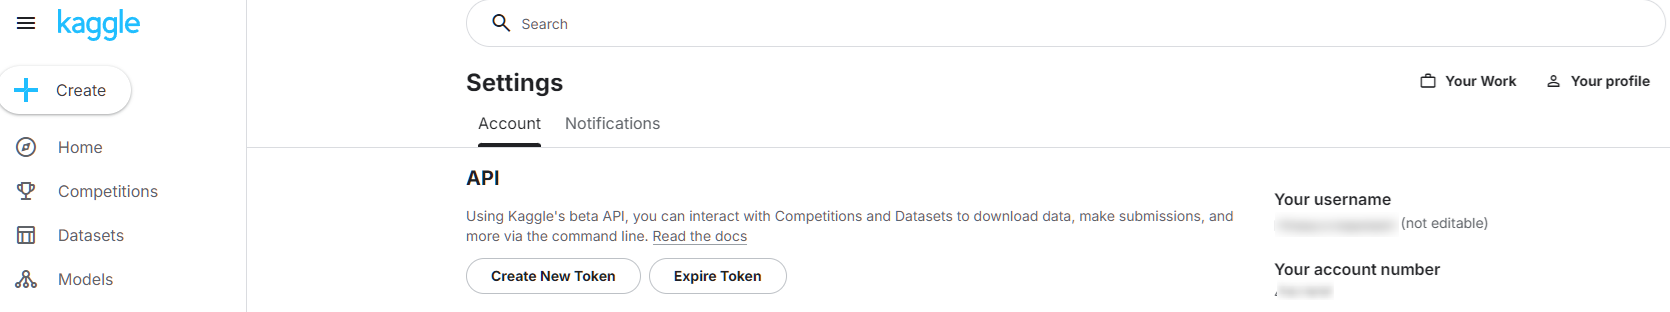



In [ ]:
import opendatasets as od

# Download the dataset
od.download("https://www.kaggle.com/datasets/yasserh/walmart-dataset")

Skipping, found downloaded files in "./walmart-dataset" (use force=True to force download)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
walmart_data = pd.read_csv('walmart-dataset/Walmart.csv')

In [ ]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data_y = walmart_data['Weekly_Sales'] # target
data_x = walmart_data.drop(['Weekly_Sales'], axis=1) # input features

In [ ]:
data_x.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,0,46.50,2.625,211.350143,8.106


In [ ]:
data_y

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68
...,...
6430,713173.95
6431,733455.07
6432,734464.36
6433,718125.53


In [ ]:
desc = data_x.describe()
desc

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
x = data_x[["Store", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].apply(lambda x: (x-x.min())/(x.max()-x.min())).to_numpy()

In [ ]:
y=data_y.to_numpy()
y_max = np.max(y)
y_min = np.min(y)
y = (y-y_min)/(y_max-y_min)

In [ ]:
data_x.iloc[:140].describe()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,140.0,140.000000,140.000000,140.000000,140.000000,140.000000
mean,1.0,0.071429,68.341071,3.212257,215.837888,7.632650
std,0.0,0.258464,14.396135,0.428763,4.257347,0.355971
min,1.0,0.000000,35.400000,2.514000,210.337426,6.573000
25%,1.0,0.000000,57.682500,2.753000,211.529051,7.348000
50%,1.0,0.000000,69.865000,3.287000,215.391694,7.787000
75%,1.0,0.000000,80.540000,3.579750,220.195306,7.845000
max,1.0,1.000000,91.650000,3.907000,223.181477,8.106000


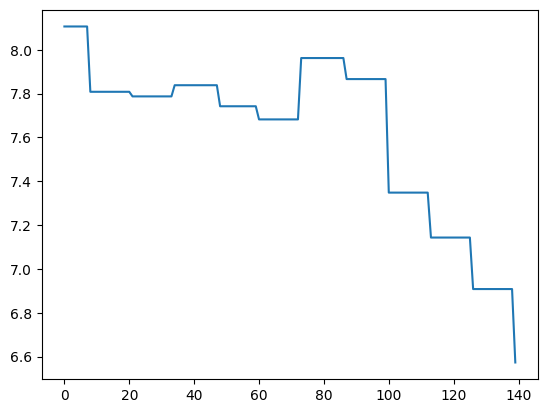

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data_x["Unemployment"].iloc[:140])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], dayfirst=True)

In [ ]:
holiday_dict = {"Super Bowl": ["12-02-2010", "11-02-2011", "10-02-2012", "08-02-2013"],
    "Labor Day": ["10-09-2010", "09-09-2011", "07-09-2012", "06-09-2013"],
    "Thanksgiving": ["26-11-2010", "25-11-2011", "23-11-2012", "29-11-2013"],
    "Christmas": ["31-12-2010", "30-12-2011", "28-12-2012", "27-12-2013"]}


for key in holiday_dict:
  holiday_dict[key]=[pd.to_datetime(d, dayfirst=True).date() for d in holiday_dict[key]]


walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], dayfirst=True)
def holiday_type(date):
    for key, value in holiday_dict.items():
        for hol_date in value:
            if abs((date - hol_date).days) <= 3:
                return key
    return "None"

walmart_data['Date'] = pd.to_datetime(walmart_data['Date']).dt.date
walmart_data['Holiday_Type'] = walmart_data['Date'].apply(holiday_type)

walmart_data = walmart_data.drop('Holiday_Flag', axis=1, errors='ignore')

print(walmart_data.head())

   Store        Date  Weekly_Sales  Temperature  Fuel_Price         CPI  \
0      1  2010-02-05    1643690.90        42.31       2.572  211.096358   
1      1  2010-02-12    1641957.44        38.51       2.548  211.242170   
2      1  2010-02-19    1611968.17        39.93       2.514  211.289143   
3      1  2010-02-26    1409727.59        46.63       2.561  211.319643   
4      1  2010-03-05    1554806.68        46.50       2.625  211.350143   

   Unemployment Holiday_Type  
0         8.106         None  
1         8.106   Super Bowl  
2         8.106         None  
3         8.106         None  
4         8.106         None  


In [ ]:
data_model = pd.get_dummies(walmart_data, columns=["Store", "Holiday_Type"], drop_first=True)

In [ ]:
#hot encoded
print("Columns:", walmart_data.columns)
print("Unique Holiday_Type values:", walmart_data['Holiday_Type'].unique())
walmart_encoded = pd.get_dummies(walmart_data, columns=['Holiday_Type', 'Store'], drop_first=True)
print(walmart_encoded.columns)
print(walmart_encoded.filter(like='Holiday_Type').head())


Columns: Index(['Store', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Holiday_Type', 'Month', 'WeekOfYear', 'DayOfWeek'],
      dtype='object')
Unique Holiday_Type values: ['None' 'Super Bowl' 'Labor Day' 'Thanksgiving' 'Christmas']
Index(['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Month', 'WeekOfYear', 'DayOfWeek',
       'Holiday_Type_Labor Day', 'Holiday_Type_None',
       'Holiday_Type_Super Bowl', 'Holiday_Type_Thanksgiving', 'Store_2',
       'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8',
       'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14',
       'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20',
       'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26',
       'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32',
       'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38',
       

In [ ]:
# One-hot encode - drop first to avoid multicollinearity
walmart_encoded = pd.get_dummies(walmart_data, columns=['Holiday_Type', 'Store'], drop_first=True)

# Define features (x) and target variable (y)
x = walmart_encoded.drop(['Weekly_Sales', 'Date'], axis=1)
y = walmart_encoded['Weekly_Sales']

# Display the first few rows of the encoded dataset
print(walmart_encoded.head())

# Function to find the best random_state for train-test split based on highest R² score
def find_best_random_state(x, y, max_state, test_size):
    best_r2 = float('-inf')
    best_state = None

    for state in range(max_state):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=state)
        model = LinearRegression()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)

        if r2 > best_r2:
            best_r2 = r2
            best_state = state

    print(f"Best random_state: {best_state} with R-squared: {best_r2:.4f}")
    return best_state, best_r2

# Find and store the best random_state and corresponding R² score
best_random_state, best_r2 = find_best_random_state(x, y, 200, 0.2)

# Split the data using the best random_state
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=best_random_state)

# Train the final linear regression model and make predictions
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)



        Date  Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
0 2010-02-05    1643690.90        42.31       2.572  211.096358         8.106   
1 2010-02-12    1641957.44        38.51       2.548  211.242170         8.106   
2 2010-02-19    1611968.17        39.93       2.514  211.289143         8.106   
3 2010-02-26    1409727.59        46.63       2.561  211.319643         8.106   
4 2010-03-05    1554806.68        46.50       2.625  211.350143         8.106   

   Month  WeekOfYear  DayOfWeek  Holiday_Type_Labor Day  ...  Store_36  \
0      2           5          4                   False  ...     False   
1      2           6          4                   False  ...     False   
2      2           7          4                   False  ...     False   
3      2           8          4                   False  ...     False   
4      3           9          4                   False  ...     False   

   Store_37  Store_38  Store_39  Store_40  Store_41  Store_42  Store

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

#MSE
mse = np.mean((y_test - y_pred)**2)
print (f"Mean Squared Error: {mse}")

#MAE
mae = mean_absolute_error(y_test, y_pred)
print (f"Mean Absolute Error: {mae}")

# Calculate RMSE
rmse = np.sqrt(mse)
print (f"Root Mean Squared Error: {rmse}")

# Calculate R-Squared
r_squared = r2_score(y_test, y_pred)
print (f"R-squared:{r_squared}")


Mean Squared Error: 14942231972.70618
Mean Absolute Error: 85678.7845969517
Root Mean Squared Error: 122238.42265305201
R-squared:0.9512488533909764


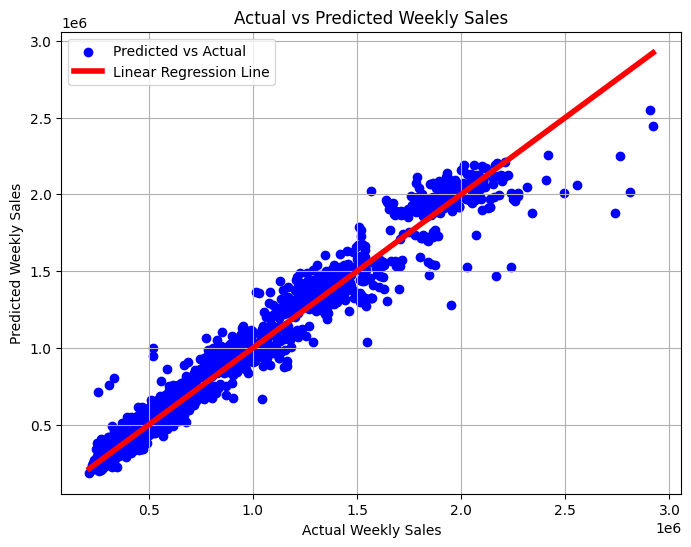

In [ ]:
# Set up the figure size for the plot
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted sales
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plot a reference line (ideal prediction line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=4, label='Linear Regression Line')

# Add labels, title, legend, and grid to the plot
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

